# Seattle Public Library (SPL) data analysis (checkouts 2017)

This notebook performs some exploratory analysis on the [Seattle Public Library Checkout Records dataset](https://www.kaggle.com/seattle-public-library/seattle-library-checkout-records) found on Kaggle.

This notebook will be exploring the checkouts file for 2017.

## Set up and load data

In [1]:
import os

import findspark
findspark.init()

from dotenv import load_dotenv
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.types import IntegerType, FloatType, StringType, StructField, StructType
from pyspark_dist_explore import hist

import helpers as H
 
%matplotlib inline

spark = SparkSession.builder.appName("ExploreSplCheckouts").getOrCreate()

In [2]:
load_dotenv()

SPL_CHECKOUTS_2017_PATH = os.getenv("SPL_CHECKOUTS_2017_PATH")

In [7]:
spl_df = spark.read.option("header", "true").csv(SPL_CHECKOUTS_2017_PATH)

# Add a column that stores checkout date time as a datetime object
spl_df = spl_df.withColumn(
    "CheckoutDateTime", 
    F.to_timestamp(spl_df.CheckoutDateTime, "MM/dd/yyyy H:m:s a"),
)

## Inspect table

In [8]:
spl_df.limit(5).toPandas().head()

,BibNumber,ItemBarcode,ItemType,Collection,CallNumber,CheckoutDateTime
0,2543647,0010063298235,accd,nacd,CD 782.42166 C6606So,2017-01-02 08:13:00
1,3172300,0010087522552,acbk,namys,MYSTERY COTTERI 2016,2017-01-02 08:13:00
2,2393405,0010054483200,acbk,camys,MYSTERY MAY2006,2017-01-02 08:24:00
3,3199718,0010088153514,acdvd,nadvdnf,DVD 781.66092 M3347G 2013,2017-01-02 08:33:00
4,3211526,0010089643810,accd,nacd,CD 782.42166 Sh75o,2017-01-02 08:33:00


## BibNumber

In [9]:
H.get_basic_counts(spl_df, spl_df.BibNumber)
H.check_nulls(spl_df, spl_df.BibNumber, spl_df.ItemBarcode)
H.check_empty_strings(spl_df, spl_df.BibNumber)
H.check_lengths(spl_df, spl_df.BibNumber)

+----------------+-------------------------+
|count(BibNumber)|count(DISTINCT BibNumber)|
+----------------+-------------------------+
|         5034542|                   321773|
+----------------+-------------------------+

+--------------------+
|Has Null (BibNumber)|
+--------------------+
|                   0|
+--------------------+

+---------------------+
|Has Empty (BibNumber)|
+---------------------+
|                    0|
+---------------------+

+---------+-----------------+
|BibNumber|length(BibNumber)|
+---------+-----------------+
|       33|                2|
|       91|                2|
|       91|                2|
|       91|                2|
|       91|                2|
|       33|                2|
|       32|                2|
|       91|                2|
|       91|                2|
|       52|                2|
+---------+-----------------+
only showing top 10 rows

+---------+-----------------+
|BibNumber|length(BibNumber)|
+---------+-----------------+
|

## ItemBarcode

In [10]:
H.get_basic_counts(spl_df, spl_df.ItemBarcode)
H.check_nulls(spl_df, spl_df.ItemBarcode, spl_df.BibNumber)
H.check_empty_strings(spl_df, spl_df.ItemBarcode)
H.check_lengths(spl_df, spl_df.ItemBarcode)

+------------------+---------------------------+
|count(ItemBarcode)|count(DISTINCT ItemBarcode)|
+------------------+---------------------------+
|           5034542|                    1174898|
+------------------+---------------------------+

+----------------------+
|Has Null (ItemBarcode)|
+----------------------+
|                     0|
+----------------------+

+-----------------------+
|Has Empty (ItemBarcode)|
+-----------------------+
|                      0|
+-----------------------+

+-------------+-------------------+
|  ItemBarcode|length(ItemBarcode)|
+-------------+-------------------+
|0010090566455|                 13|
|0010087630967|                 13|
|0010086289708|                 13|
|0010090543561|                 13|
|0010090248682|                 13|
|0010080207698|                 13|
|0010090973206|                 13|
|0010089987431|                 13|
|0010054337240|                 13|
|0010090469742|                 13|
+-------------+--------------

## ItemType

In [11]:
H.get_basic_counts(spl_df, spl_df.ItemType)
H.check_nulls(spl_df, spl_df.ItemType, spl_df.BibNumber)
H.check_empty_strings(spl_df, spl_df.ItemType)
H.check_lengths(spl_df, spl_df.ItemType)

+---------------+------------------------+
|count(ItemType)|count(DISTINCT ItemType)|
+---------------+------------------------+
|        5034542|                      44|
+---------------+------------------------+

+-------------------+
|Has Null (ItemType)|
+-------------------+
|                  0|
+-------------------+

+--------------------+
|Has Empty (ItemType)|
+--------------------+
|                   0|
+--------------------+

+--------+----------------+
|ItemType|length(ItemType)|
+--------+----------------+
|    acbk|               4|
|    acbk|               4|
|    acbk|               4|
|    acbk|               4|
|    acbk|               4|
|    accd|               4|
|    accd|               4|
|    acbk|               4|
|    acbk|               4|
|    jcbk|               4|
+--------+----------------+
only showing top 10 rows

+--------+----------------+
|ItemType|length(ItemType)|
+--------+----------------+
| alaptop|               7|
| alaptop|               7|

## Collection

In [12]:
H.get_basic_counts(spl_df, spl_df.Collection)
H.check_nulls(spl_df, spl_df.Collection, spl_df.BibNumber)
H.check_empty_strings(spl_df, spl_df.Collection)
H.check_lengths(spl_df, spl_df.Collection)

+-----------------+--------------------------+
|count(Collection)|count(DISTINCT Collection)|
+-----------------+--------------------------+
|          5034542|                       193|
+-----------------+--------------------------+

+---------------------+
|Has Null (Collection)|
+---------------------+
|                    0|
+---------------------+

+----------------------+
|Has Empty (Collection)|
+----------------------+
|                     0|
+----------------------+

+----------+------------------+
|Collection|length(Collection)|
+----------+------------------+
|       ncb|                 3|
|       ccb|                 3|
|       nab|                 3|
|       ncb|                 3|
|       ccb|                 3|
|       ncb|                 3|
|       nab|                 3|
|       cab|                 3|
|       cs8|                 3|
|       ccb|                 3|
+----------+------------------+
only showing top 10 rows

+----------+------------------+
|Collection

## CallNumber

In [13]:
H.get_basic_counts(spl_df, spl_df.Collection)
H.check_nulls(spl_df, spl_df.CallNumber, spl_df.BibNumber)
H.check_empty_strings(spl_df, spl_df.CallNumber)
H.check_lengths(spl_df, spl_df.CallNumber)

+-----------------+--------------------------+
|count(Collection)|count(DISTINCT Collection)|
+-----------------+--------------------------+
|          5034542|                       193|
+-----------------+--------------------------+

+---------------------+
|Has Null (CallNumber)|
+---------------------+
|                   78|
+---------------------+

+----------------------+
|Has Empty (CallNumber)|
+----------------------+
|                     0|
+----------------------+

+----------+------------------+
|CallNumber|length(CallNumber)|
+----------+------------------+
|      null|              null|
|      null|              null|
|      null|              null|
|      null|              null|
|      null|              null|
|      null|              null|
|      null|              null|
|      null|              null|
|      null|              null|
|      null|              null|
+----------+------------------+
only showing top 10 rows

+--------------------+------------------+
|

## CheckoutDateTime

In [14]:
H.get_basic_counts(spl_df, spl_df.CheckoutDateTime)
H.check_nulls(spl_df, spl_df.CheckoutDateTime, spl_df.BibNumber)

+-----------------------+--------------------------------+
|count(CheckoutDateTime)|count(DISTINCT CheckoutDateTime)|
+-----------------------+--------------------------------+
|                1221580|                           51218|
+-----------------------+--------------------------------+

+---------------------------+
|Has Null (CheckoutDateTime)|
+---------------------------+
|                    3812962|
+---------------------------+



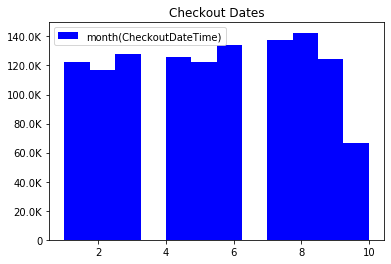

In [16]:
# This should actually be a barchart (not a histogram)
H.plot_hist(spl_df.select(F.month(spl_df.CheckoutDateTime)), bins=24, title="Checkout Dates")